### Test case LVV-T1757 - Verify calculation of photometric repeatability in gri filters

Verify that the DM system has provided the code to calculate the RMS photometric repeatability of bright non-saturated unresolved point sources in the g, r, and i filters, and assess whether it meets the requirement that it shall be less than PA1gri = 5.0 millimagnitudes.

#### Discussion:

This test can be verified using data products produced during regular reprocessing campaigns executed by the Data Management pipelines team. In particular, we will use the regularly-reprocessed HSC RC2 data as reprocessed with weekly pipelines version w_2024_34, in Butler collection “HSC/runs/RC2/w_2024_34/DM-45857".

The `PA1` metric and related plots are created by tasks in the `analysis_tools` package. Thus verification of this requirement can be accomplished by simply retrieving the datasets produced by those tasks and confirming that they meet the requiremed accuracy.

In [1]:
import matplotlib.pyplot as plt

from lsst.daf.butler import Butler
from IPython.display import Image

In [2]:
# Initialize the butler repo pointing to the DM-45857 (w_2024_34) collection
repo = '/repo/main'
collection = 'HSC/runs/RC2/w_2024_34/DM-45857'

butler = Butler(repo, collections=collection)

Select one of the three tracts in the RC2 dataset (either 9615, 9697, or 9813). Then fetch the metrics from matching `objectTable_tract` to the Gaia DR3 refcat.

In [3]:
did_tract9615 = {'instrument':'HSC', 'tract':9615, 'skymap':'hsc_rings_v1'}
metric_extract9615 = butler.get('matchedVisitCore_metrics', collections=collection, dataId=did_tract9615)
did_tract9697 = {'instrument':'HSC', 'tract':9697, 'skymap':'hsc_rings_v1'}
metric_extract9697 = butler.get('matchedVisitCore_metrics', collections=collection, dataId=did_tract9697)
did_tract9813 = {'instrument':'HSC', 'tract':9813, 'skymap':'hsc_rings_v1'}
metric_extract9813 = butler.get('matchedVisitCore_metrics', collections=collection, dataId=did_tract9813)

Print the metrics to the screen:

In [4]:
print('Tract 9615:\n')
for met in metric_extract9615['stellarPhotometricRepeatability']:
    if ('stellarPhotRepeatStdev' in met.metric_name.metric) and \
       (met.metric_name.metric.startswith('g_') or met.metric_name.metric.startswith('r_') or \
        met.metric_name.metric.startswith('i_')):
        print(met.datum)

print('\nTract 9697:\n')
for met in metric_extract9697['stellarPhotometricRepeatability']:
    if ('stellarPhotRepeatStdev' in met.metric_name.metric) and \
       (met.metric_name.metric.startswith('g_') or met.metric_name.metric.startswith('r_') or \
        met.metric_name.metric.startswith('i_')):
        print(met.datum)

print('\nTract 9813:\n')
for met in metric_extract9813['stellarPhotometricRepeatability']:
    if ('stellarPhotRepeatStdev' in met.metric_name.metric) and \
       (met.metric_name.metric.startswith('g_') or met.metric_name.metric.startswith('r_') or \
        met.metric_name.metric.startswith('i_')):
        print(met.datum)

Tract 9615:

g_stellarPhotRepeatStdev = 7.360372756585042 mmag
r_stellarPhotRepeatStdev = 7.310127362160896 mmag
i_stellarPhotRepeatStdev = 7.681557846472162 mmag

Tract 9697:

g_stellarPhotRepeatStdev = 7.568516976849985 mmag
r_stellarPhotRepeatStdev = 7.307150392342701 mmag
i_stellarPhotRepeatStdev = 8.463987073483437 mmag

Tract 9813:

g_stellarPhotRepeatStdev = 8.244435978318048 mmag
r_stellarPhotRepeatStdev = 8.996621377730957 mmag
i_stellarPhotRepeatStdev = 8.029737389585424 mmag


The photometric repeatability for each band is given by `"band"_stellarPhotRepeatStdev`. We see that for all bands and all tracts, `stellarPhotRepeatStdev` is slightly higher than the 5 mmag threshold.

### Plots associated with the metrics

Retrieve the plots that are created alongside the metrics by `analysis_tools`, and display them in the notebook.

Extract the byte-level data for the images into a dict, which we will then use to display the plots:

In [5]:
plot_dict = {}

for band in ['g', 'r', 'i']:
    plot_name = f"matchedVisitCore_{band}_stellarPhotometricRepeatability_HistPlot"
    ref = butler.registry.findDataset(plot_name, did_tract9615, collections=collection)
    uri = butler.getURI(ref)
    image_bytes = uri.read()
    plot_dict[plot_name] = image_bytes

Display the plots. Note that I manually entered the key to the plot dict in each of the following 3 cells. For some reason they don't display if I loop over them...

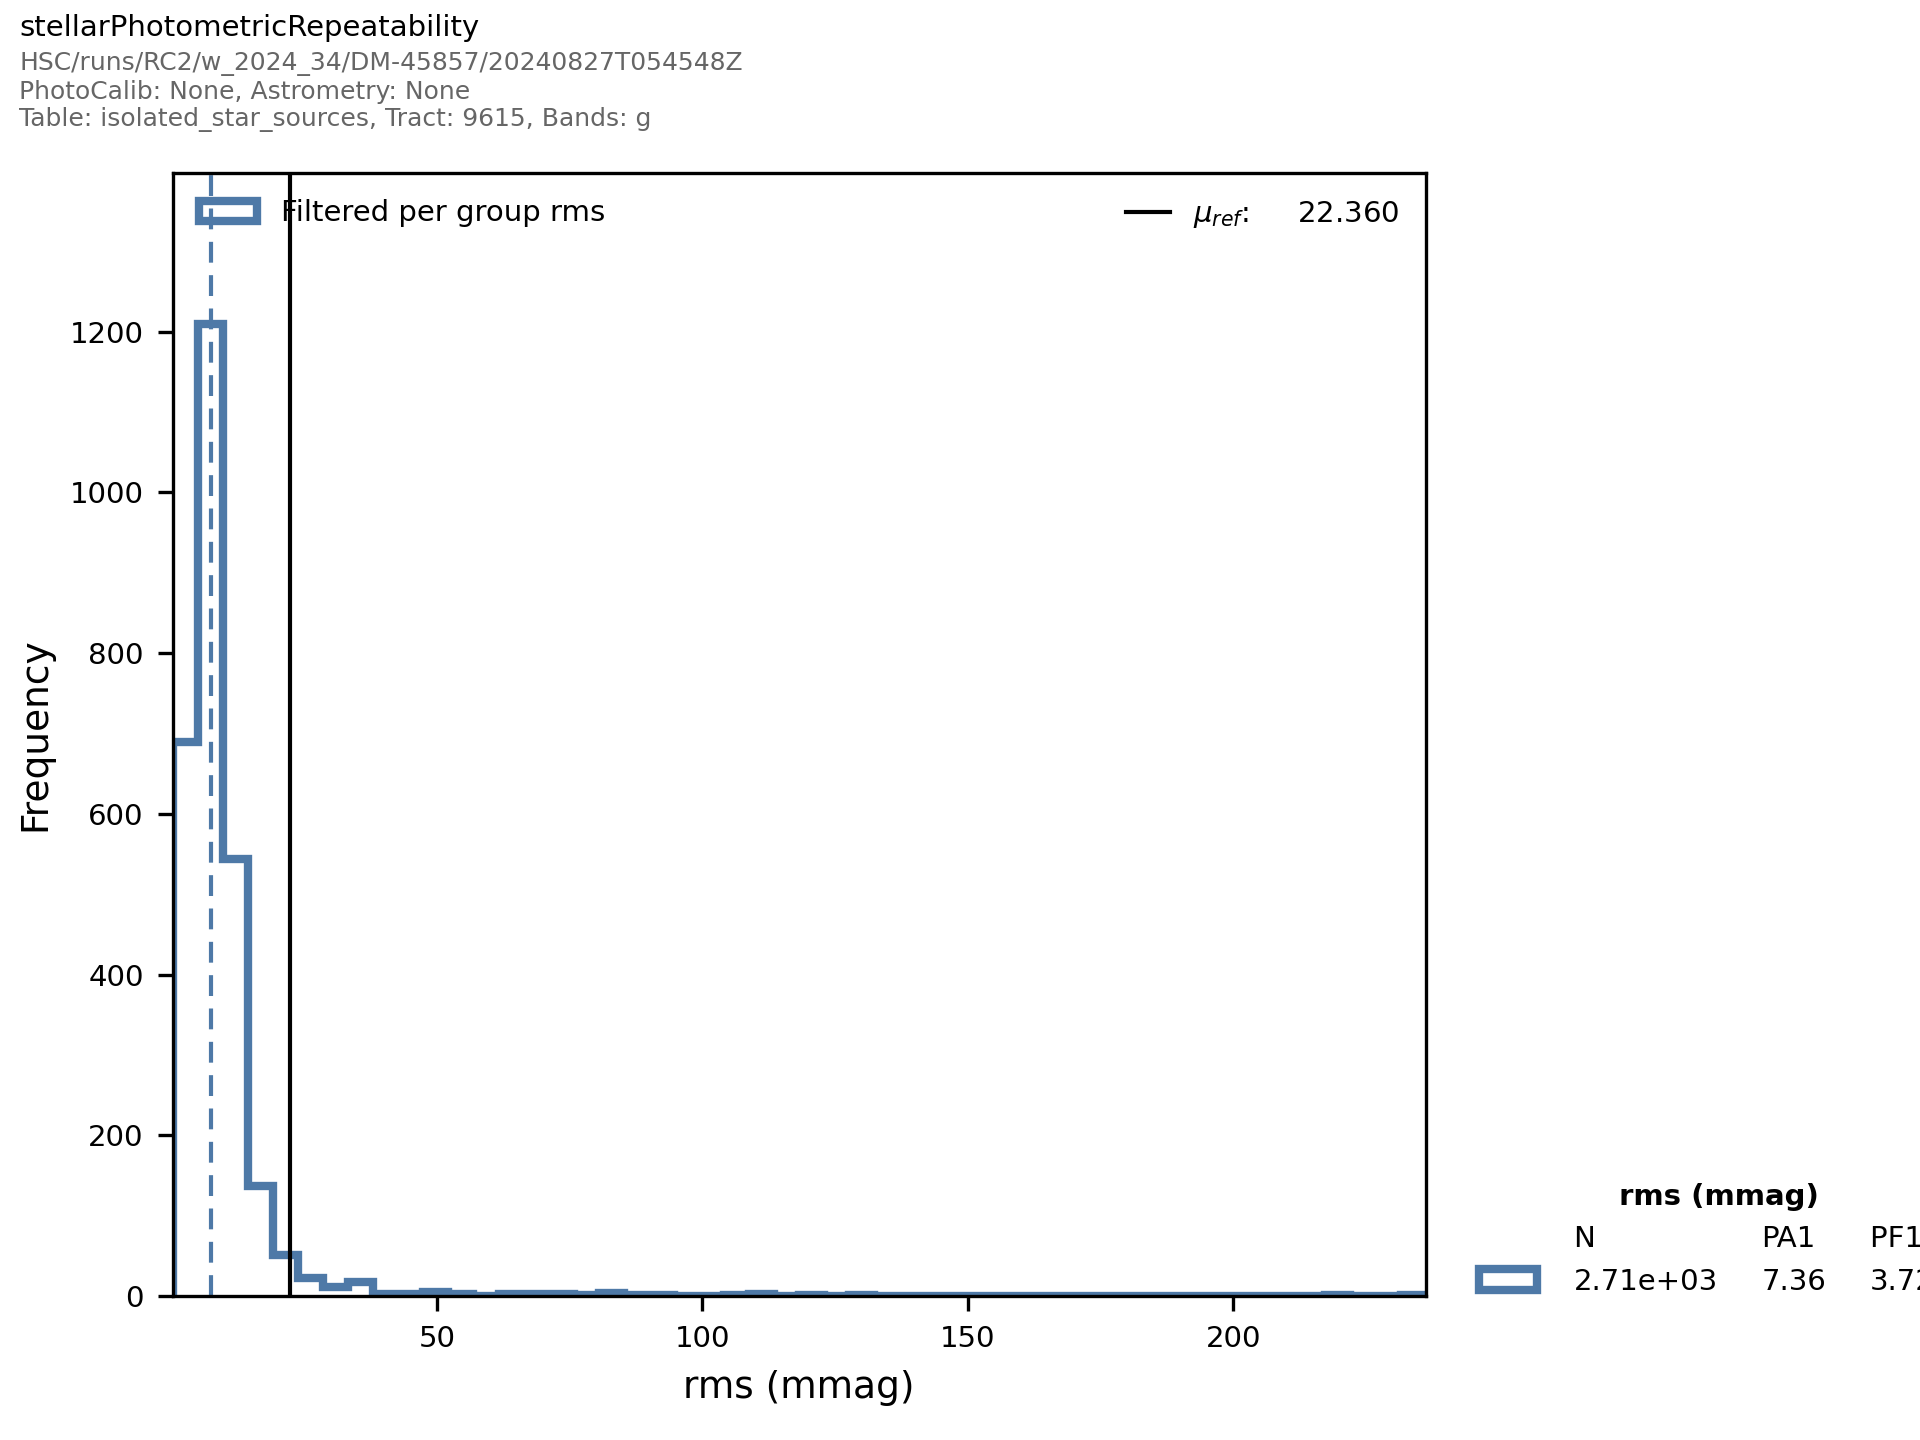

In [6]:
Image(plot_dict['matchedVisitCore_g_stellarPhotometricRepeatability_HistPlot'], width=600)

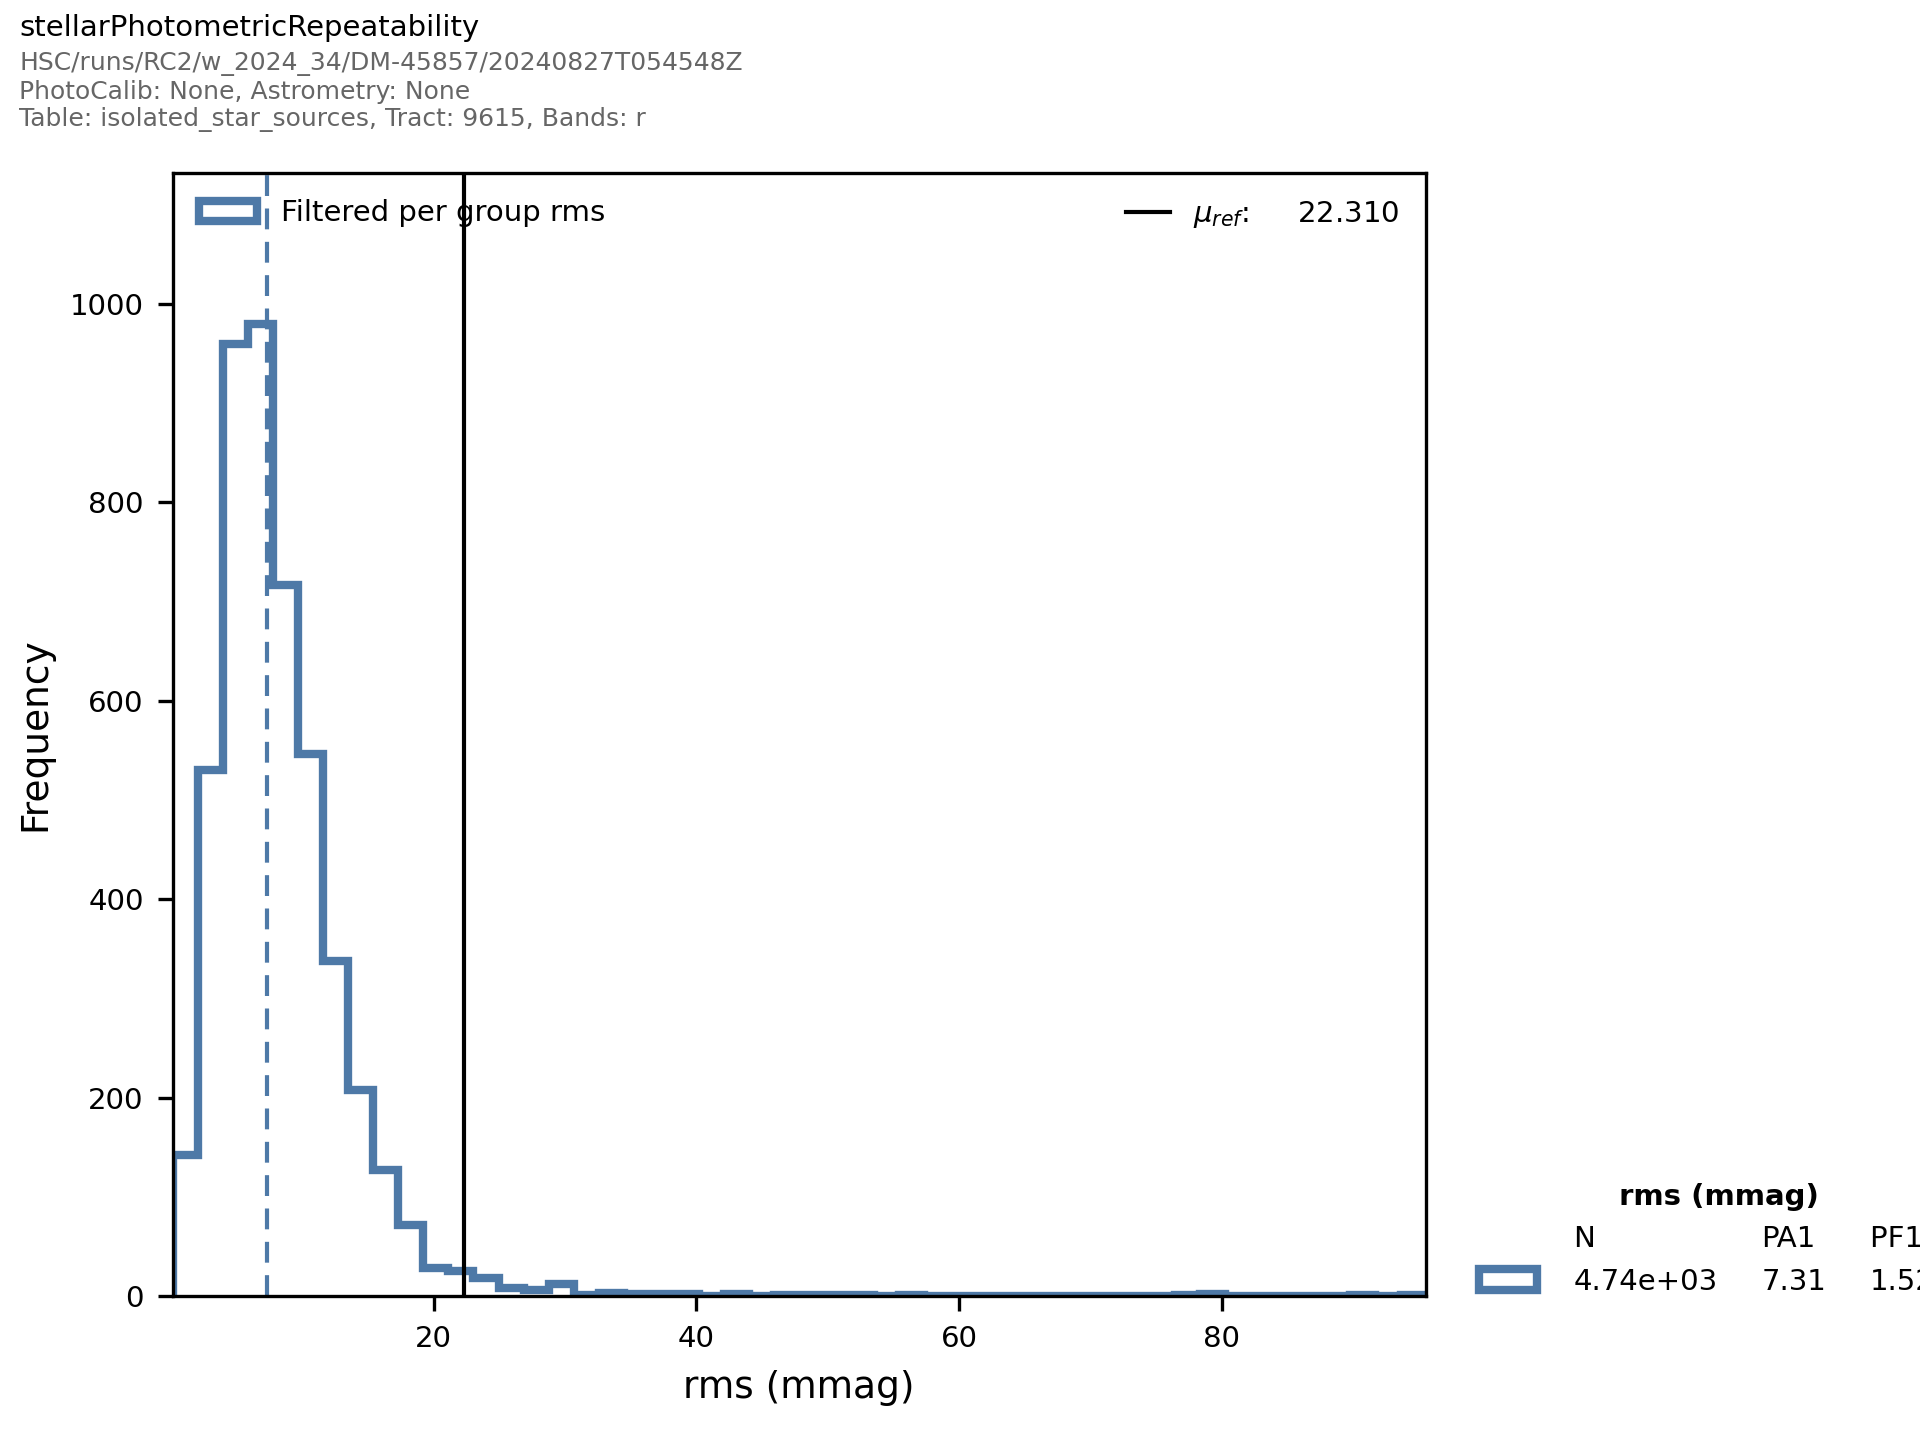

In [7]:
Image(plot_dict['matchedVisitCore_r_stellarPhotometricRepeatability_HistPlot'], width=600)

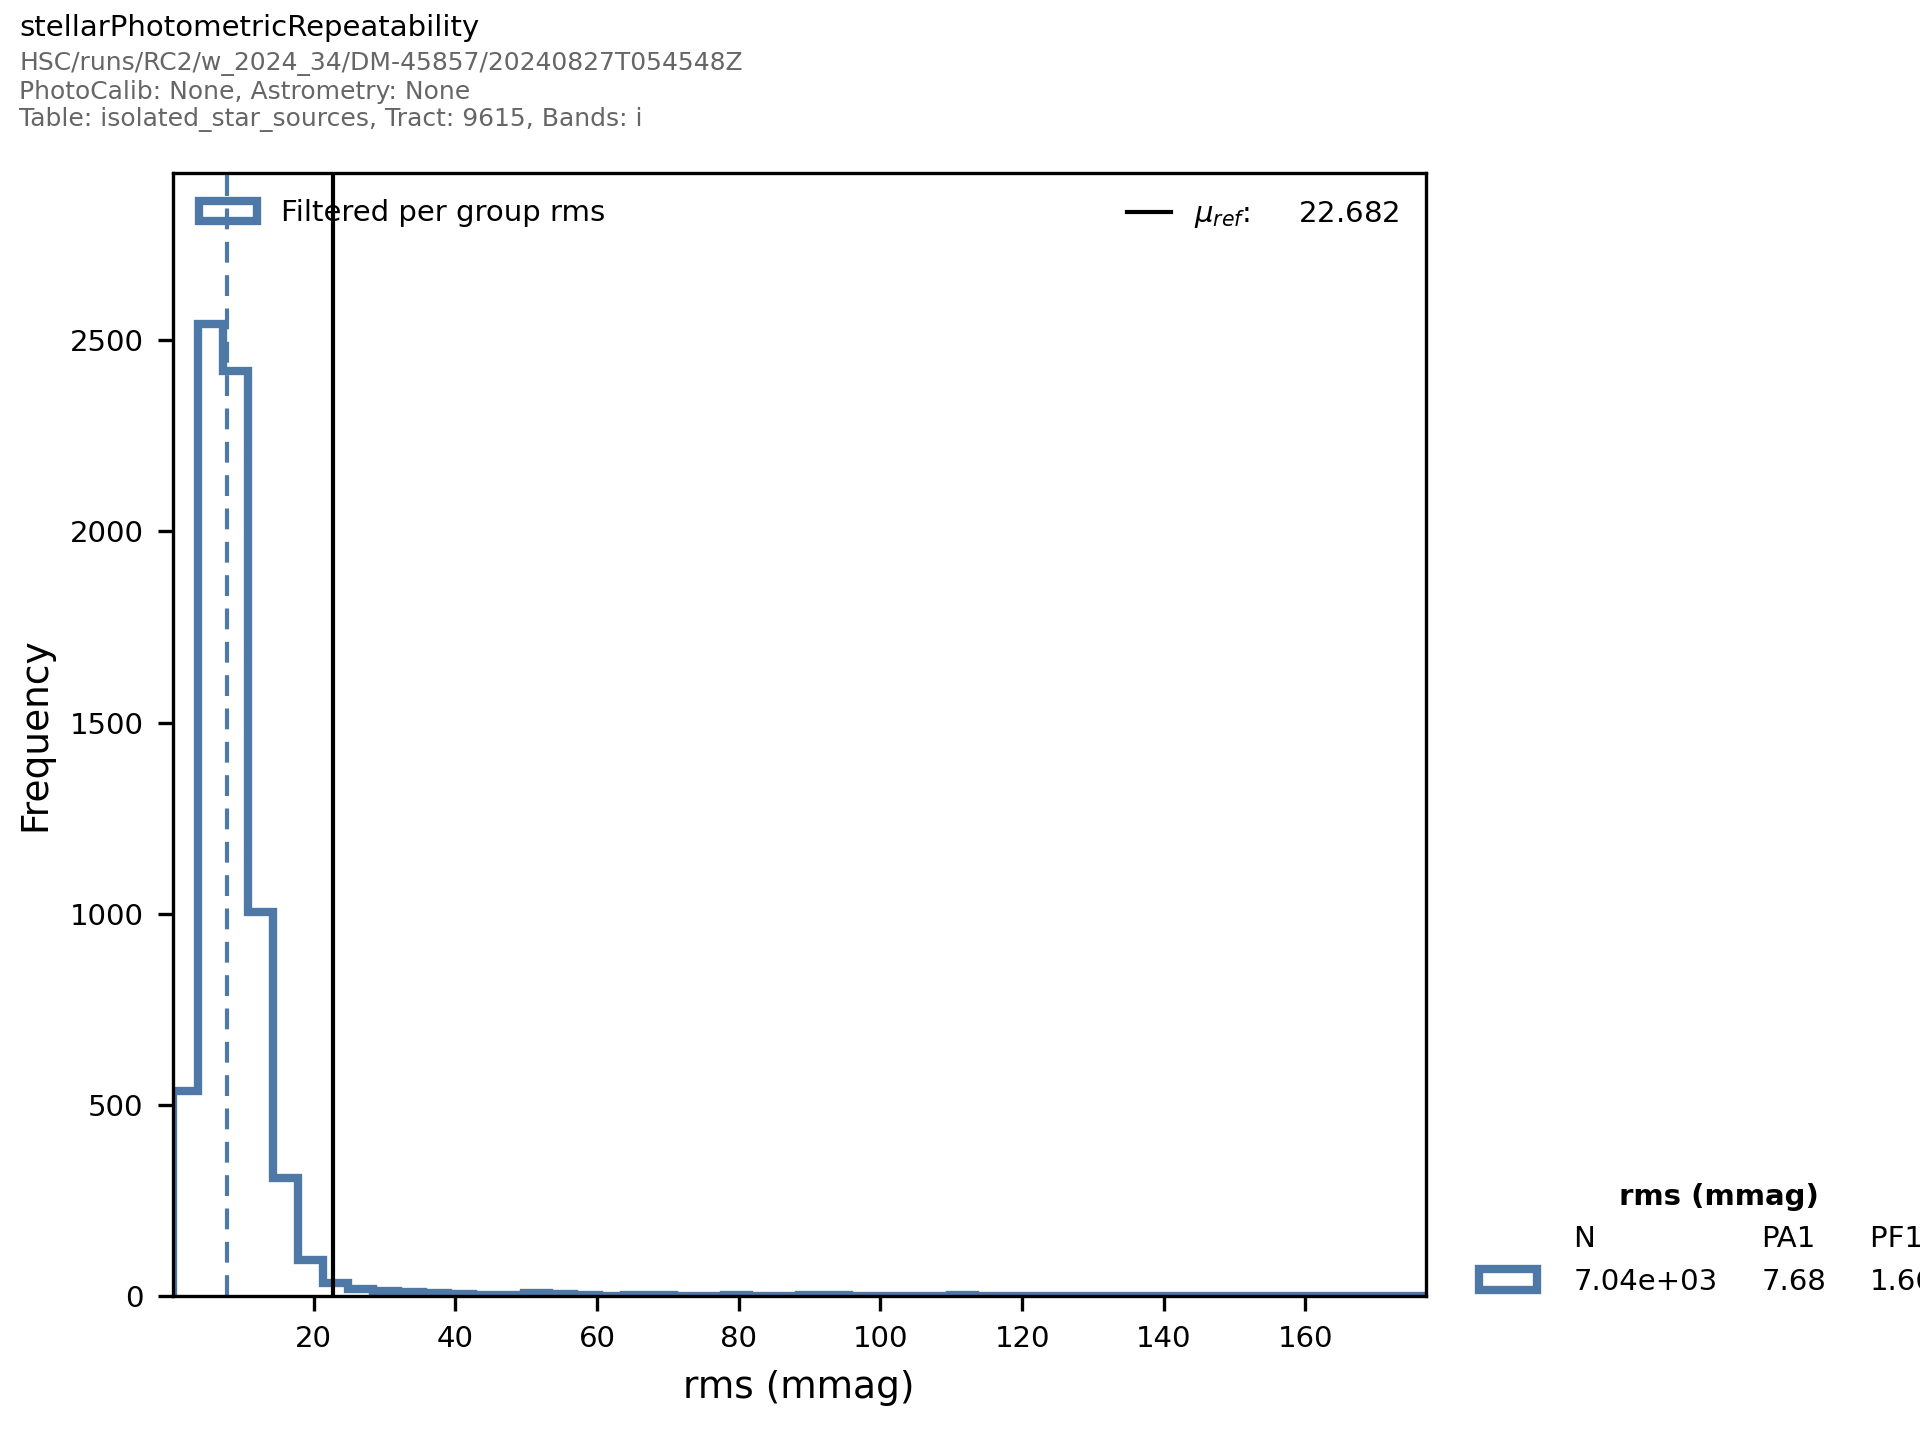

In [8]:
Image(plot_dict['matchedVisitCore_i_stellarPhotometricRepeatability_HistPlot'], width=600)

### Metric monitoring

The figure below shows a section of our metrics monitoring dashboard, illustrating the tracking of PA1 metrics from July 2023 to the present. In particular, this panel shows PA1 measurements over that time period from the monthly reprocessing of the RC2 dataset, tract 9813. Note the appearance in May 2024 of additional metrics that measure PA1 using the `calibFlux` (measured in a 12-pixel aperture) rather than PSF fluxes.

Note also that PA1 metrics are reported in the Characterization Metrics Report accompanying each major Rubin Science Pipelines release. Examples can be seen at 
[DMTR-431 (v27)](https://docushare.lsst.org/docushare/dsweb/Get/Version-81383/DMTR-431.pdf), [DMTR-421 (v26)](https://docushare.lsst.org/docushare/dsweb/Get/Version-79715/DMTR-421.pdf), [DMTR-392 (v25)](https://docushare.lsst.org/docushare/dsweb/Get/Version-77645/DMTR-392.pdf), which correspond to release versions 27, 26, and 25 of the pipelines.

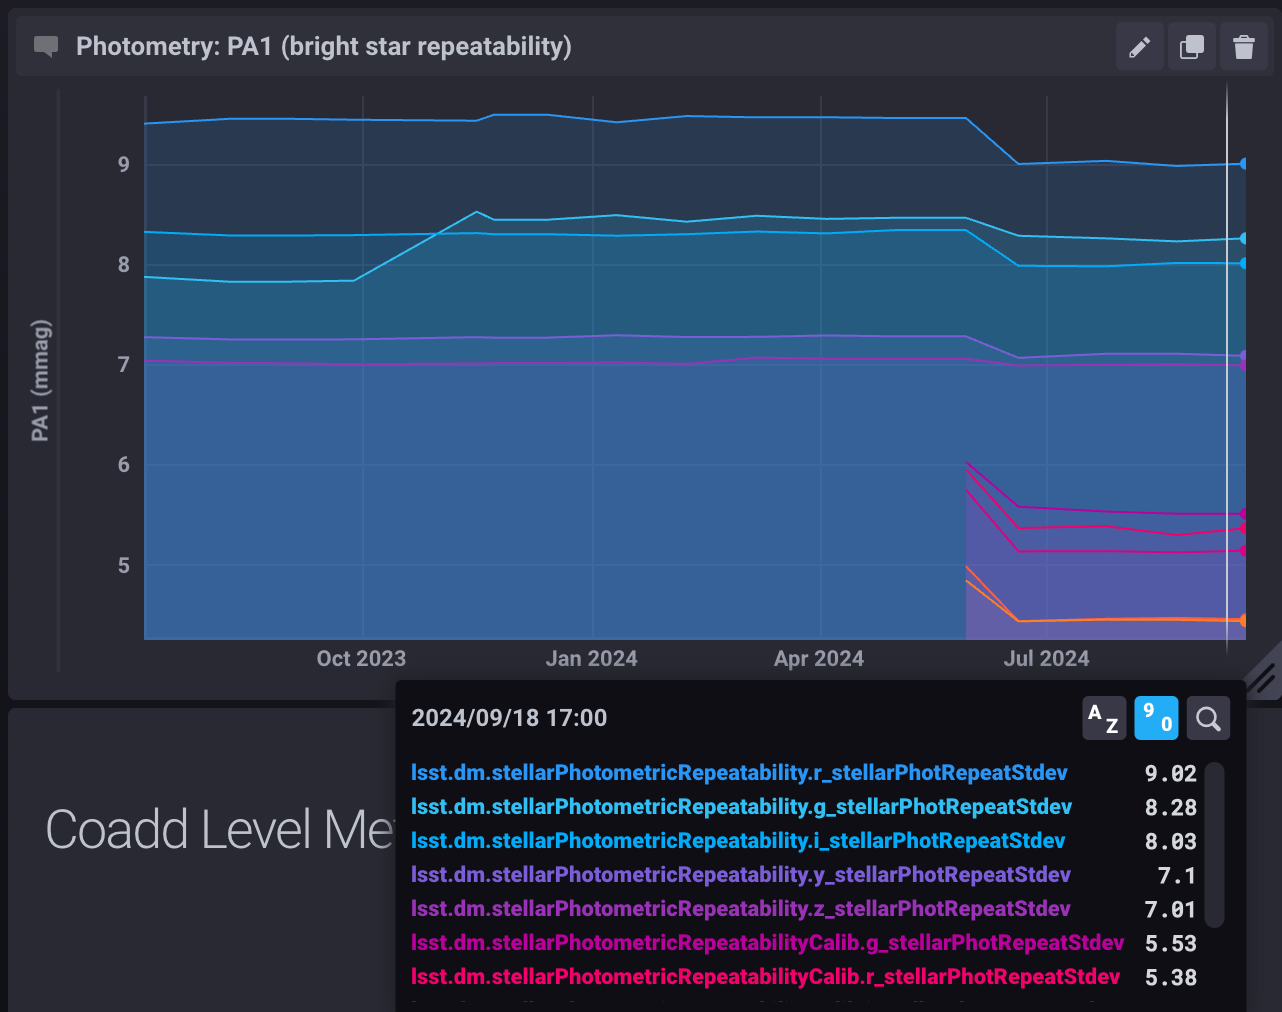

In [9]:
Image("figures/chronograf_PA1_history_jul2023_oct2024.png", width=600)

## Results
We have demonstrated that there is software within the Rubin Science Pipelines to calculate photometric repeatability (`PA1`) in the _gri_ filters. Additionally we have shown the metrics and plots that are produced by `analysis_tools` each time the DRP pipeline is executed. Thus the result of this test is a "**Pass**".